In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import altair as alt

# Figure 2 and Supplementary Figure 3

In [4]:
df = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Figure 2')

In [5]:
with_reclustering = [
    'Metabat', 
    'Metadecoder', 
    'Comebin', 
    'SemiBin (WITH reclustering)', 
    'AVAMB (reclustering)', 
    'VAMB (reclustering)', 
    'MMSeqs+TaxVAMB (reclustered)', 
    'Metabuli+TaxVAMB (reclustered)', 
    'Kraken2+TaxVAMB (reclustered)', 
    'Centrifuge+TaxVAMB (reclustered)', 
]

label_map = {
    'Metabat': 'Metabat', 
    'Metadecoder': 'Metadecoder', 
    'Comebin': 'Comebin', 
    'SemiBin (WITH reclustering)': 'SemiBin', 
    'AVAMB (reclustering)': 'AVAMB', 
    'VAMB (reclustering)': 'VAMB', 
    'MMSeqs+TaxVAMB (reclustered)': 'TaxVAMB (MMSeqs)', 
    'Metabuli+TaxVAMB (reclustered)': 'TaxVAMB (Metabuli)', 
    'Kraken2+TaxVAMB (reclustered)': 'TaxVAMB (Kraken2)', 
    'Centrifuge+TaxVAMB (reclustered)': 'TaxVAMB (Centrifuge)', 
}

label_map_values = [
    'Metabat', 
    'Metadecoder', 
    'Comebin', 
    'SemiBin', 
    'AVAMB', 
    'VAMB', 
    'TaxVAMB (MMSeqs)', 
    'TaxVAMB (Metabuli)', 
    'TaxVAMB (Kraken2)', 
    'TaxVAMB (Centrifuge)', 
]

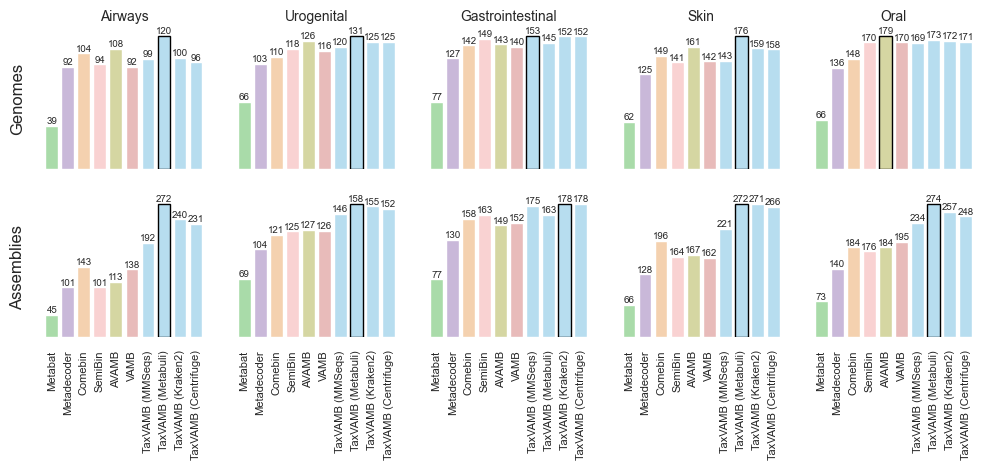

In [6]:
sns.set_theme(style="whitegrid")

df_final = df[df['Method'].isin(with_reclustering)].copy()
df_final['labels'] = df_final['Method'].map(label_map)

f, axs = plt.subplots(2, 5, figsize=(12, 4), sharex=True, sharey=False)

taxvamb_colors = ['#ade1f9']*4
colors = ['#f0b3b2', '#ffcccc', '#a1e3a1', '#c9b3de', '#ffd1a4', '#dedf99'] + taxvamb_colors

map_labels = {
    'BB NC genomes': 'Genomes',
    'BB NC asms': 'Assemblies',
}

for j, s in enumerate(['Airways', 'Urogenital', 'Gastrointestinal', 'Skin', 'Oral']):
    df_s = df_final[df_final['Dataset'] == s]
    sns.set_color_codes("pastel")
    sns.despine(left=True, bottom=True)
    for i, Y in enumerate(['BB NC genomes', 'BB NC asms']):
        
        ax = axs[i][j]
        g = sns.barplot(x="labels", y=Y, data=df_s, hue='labels', palette=colors, orient='v', order=label_map_values, ax=ax, legend=False)

        heights = []
        for bars in ax.containers:
            ax.bar_label(bars, label_type='edge', size=7)
            for _, bar in enumerate(bars):
                heights.append(bar.get_height())

        if not np.all(np.isnan(np.array(heights))):
            tallest = np.nanargmax(np.array(heights))
            ax.containers[tallest].patches[0].set_edgecolor('black')
                
        ax.set_xlabel('')
        if j != 0:
            ax.set_ylabel('')
        else:
            ax.set_ylabel(map_labels[Y], fontsize=12)
        if i == 0:
            ax.set_title(s, fontsize=10)
        ax.grid(False)

    
for j in range(10):
    ax = axs.flat[j]
    ax.tick_params(axis='x', rotation=90)
    ax.set_yticklabels([])
    ax.set_xticks(list(range(len(label_map_values))))
    ax.set_xticklabels(label_map_values, size=8)


plt.savefig(f'../figures/figure2_supfigure3.pdf', bbox_inches = 'tight')
plt.show()

# Figure 3

In [7]:
df = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Figure 2')

In [8]:
map_reclustering_labels = [
    'SemiBin (WITH reclustering)', 
    'VAMB (reclustering)', 
    'Metabuli+TaxVAMB (reclustered)', 
    'MMSeqs+TaxVAMB (reclustered)', 
]

map_prereclustering_labels = [
    'SemiBin (NO reclustering)', 
    'VAMB', 
    'Metabuli+TaxVAMB', 
    'MMSeqs+TaxVAMB',
]

map_labels_model = {
    'SemiBin (WITH reclustering)': 'SemiBin', 
    'SemiBin (NO reclustering)': 'SemiBin', 
    
    'VAMB (reclustering)': 'VAMB', 
    'VAMB': 'VAMB', 
    
    'Metabuli+TaxVAMB (reclustered)': 'TaxVAMB (Metabuli)', 
    'Metabuli+TaxVAMB': 'TaxVAMB (Metabuli)', 

    'MMSeqs+TaxVAMB (reclustered)': 'TaxVAMB (MMseqs2)', 
    'MMSeqs+TaxVAMB': 'TaxVAMB (MMseqs2)', 
}
order_labels = [
    'SemiBin', 'VAMB', 'TaxVAMB (Metabuli)', 
    'TaxVAMB (MMseqs2)'
]

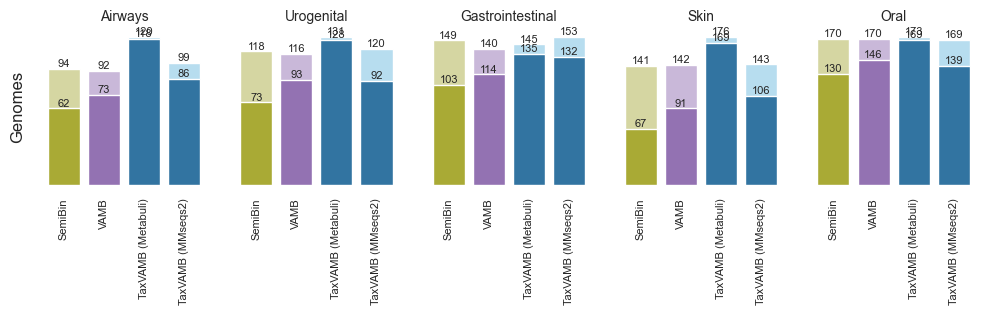

In [9]:
sns.set_theme(style="whitegrid")

df_r = df[df['Method'].isin(map_reclustering_labels + map_prereclustering_labels)].copy()

map_recluster = {k: 'After reclustering' for k in map_reclustering_labels}
map_recluster.update({k: 'Before reclustering' for k in map_prereclustering_labels})

df_r['fig_recluster'] = df_r['Method'].map(map_recluster)
df_r['fig_names'] = df_r['Method'].map(map_labels_model)


f, axs = plt.subplots(1, 5, figsize=(12, 2), sharex=True, sharey=False)
f.subplots_adjust(bottom=0.1)


taxvamb_colors = ['#ade1f9']
taxvamb_dark_colors = ['#1f77b4']

light_colors = ['#c9b3de', '#dedf99'] + taxvamb_colors + taxvamb_colors
dark_colors = ['#9467bd', '#bcbd22'] + taxvamb_dark_colors + taxvamb_dark_colors


for j, s in enumerate(['Airways', 'Urogenital', 'Gastrointestinal', 'Skin', 'Oral']):
    df_s = df_r[df_r['Dataset'] == s]
    ax = axs[j]
    
    df_after = df_s[df_s['fig_recluster'] == 'After reclustering']
    g = sns.barplot(x="fig_names", y='BB NC genomes', hue='fig_names', data=df_after, palette=light_colors, orient='v', order=order_labels, label='After reclustering', ax=ax)

    df_before = df_s[df_s['fig_recluster'] == 'Before reclustering']
    sns.barplot(x="fig_names", y='BB NC genomes', hue='fig_names', data=df_before, palette=dark_colors, orient='v', order=order_labels, label='Before reclustering', ax=ax)

    for bars in ax.containers:
        ax.bar_label(bars, label_type='edge', size=8)

    ax.set_xlabel('')
    ax.set_ylabel('Genomes', fontsize=12)
    ax.set_title(s, fontsize=10)
    ax.grid(False)

    sns.despine(left=True, bottom=True)
    
for j in range(5):
    if j > 0:
        axs[j].set_ylabel('')
    axs[j].tick_params(axis='x', rotation=90)
    axs[j].set_yticklabels([])
    ax.set_xticks(list(range(len(order_labels))))
    axs[j].set_xticklabels(order_labels, size=8)
    

plt.savefig(f'../figures/figure3.pdf', bbox_inches = 'tight')
plt.show()

# Figure 4a

In [55]:
df_long = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Figure 4a,b')

In [72]:
label_order = [
    'Metadecoder', 
    'Metabat', 
    'Comebin', 
    'SemiBin', 
    'AVAMB', 
    'VAMB', 
    'VAMB (reclustered)',
    'TaxVAMB + MMSeqs', 
    'TaxVAMB + MMSeqs (reclustered)',
]

groups = [
    'Metadecoder', 
    'Metabat', 
    'Comebin', 
    'SemiBin', 
    'AVAMB', 
    'VAMB', 
    'VAMB',
    'TaxVAMB', 
    'TaxVAMB',
]

label_order_gaps = [
    'Metadecoder', 
    'Metabat', 
    'Comebin', 
    'SemiBin', 
    'AVAMB', 
    '',
    'VAMB', 
    'VAMB (reclustered)',
    'TaxVAMB + MMSeqs', 
    'TaxVAMB + MMSeqs (reclustered)',
]

map_group = {k: v for k, v in zip(label_order, groups)}

/var/folders/5b/1dk8bnws25l6w502hfdc8xw80000gn/T/ipykernel_26804/3514361904.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x="Method", y='NC bins (CheckM2)', data=df_s, palette=colors, orient='v', order=label_order_gaps, ax=ax)
/var/folders/5b/1dk8bnws25l6w502hfdc8xw80000gn/T/ipykernel_26804/3514361904.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x="Method", y='NC bins (CheckM2)', data=df_s, palette=colors, orient='v', order=label_order_gaps, ax=ax)


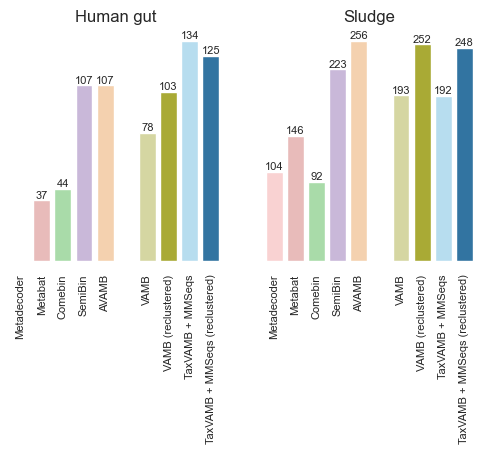

In [76]:
sns.set_theme(style="whitegrid")

df_long['group'] = df_long['Method'].map(map_group)

f, axs = plt.subplots(1, 2, figsize=(6, 3), sharex=True, sharey=False)

colors = ['#ffcccc', '#f0b3b2', '#a1e3a1', '#c9b3de', '#ffd1a4', '#000000', '#dedf99', '#bcbd22', '#ade1f9', '#1f77b4']

map_labels = {
    'BB NC genomes': 'Genomes',
    'BB NC asms': 'Assemblies',
}

for j, s in enumerate(['Human gut', 'Sludge']):
    df_s = df_long[df_long['Dataset'] == s]
    sns.set_color_codes("pastel")
    sns.despine(left=True, bottom=True)
        
    ax = axs[j]
    g = sns.barplot(x="Method", y='NC bins (CheckM2)', data=df_s, palette=colors, orient='v', order=label_order_gaps, ax=ax)

    for bars in ax.containers:
        ax.bar_label(bars, label_type='edge', size=8)
        
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(s)
    if i == 0:
        ax.set_title(s, fontsize=10)
    ax.grid(False)

    
for j in range(2):
    ax = axs[j]
    ax.tick_params(axis='x', rotation=90)
    ax.set_yticklabels([])
    ax.set_xticks(list(range(len(label_order_gaps))))
    ax.set_xticklabels(label_order_gaps, size=8)


plt.savefig(f'../figures/figure4a.pdf', bbox_inches = 'tight')
plt.show()

# Figure 4b

In [77]:
values_dict_simple = {
    'Human gut': {
        'SemiBin2 (with SCGs)': {'Phylum': 7, 'Class': 9, 'Order': 14, 'Family': 21, 'Genus': 57, 'Species': 73, 'Strain': 107},
        'VAMB (with SCGs)': {'Phylum': 8, 'Class': 10, 'Order': 16, 'Family': 25, 'Genus': 59, 'Species': 74, 'Strain': 103},
        'TaxVAMB (without SCGs)': {'Phylum': 9, 'Class': 10, 'Order': 16, 'Family': 27, 'Genus': 76, 'Species': 94, 'Strain': 134},
        
    },
}

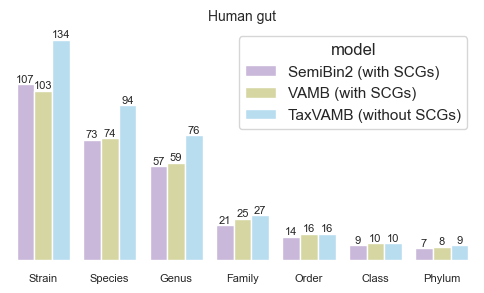

In [78]:
sns.set_theme(style="whitegrid")


levels_names = ['Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species', 'Strain'][::-1]

def make_df_from_values(values_dict):
    levels = []
    models = []
    values = []
    datasets = []

    for dataset, v1 in values_dict.items():
        for model, v2 in v1.items():
            for level, value in v2.items():
                levels.append(level)
                models.append(model)
                values.append(value)
                datasets.append(dataset)

    df_longread = pd.DataFrame({
        'model': models,
        '# of NC strains': values,
        'dataset': datasets,
        'level': levels,
    })
    
    return df_longread

df_longread_simple = make_df_from_values(values_dict_simple)

f, ax = plt.subplots(1, 1, figsize=(6, 3))


df_s = df_longread_simple

sns.set_color_codes("pastel")
sns.despine(left=True, bottom=True)
g = sns.barplot(
    x='level', 
    y='# of NC strains', 
    hue='model',
    order=levels_names,
    data=df_s, 
    orient='v', 
    palette=['#c9b3de', '#dedf99', '#ade1f9'],
    ax=ax,
)

for cont in ax.containers:
    ax.bar_label(cont, label_type='edge', size=8)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Human gut', fontsize=10)
ax.grid(False)
ax.set_yticklabels([])
ax.set_xticks(list(range(len(levels_names))))
ax.set_xticklabels(levels_names, size=8)

plt.savefig(f'../figures/figure4b.pdf', bbox_inches = 'tight')

# Figure 5b

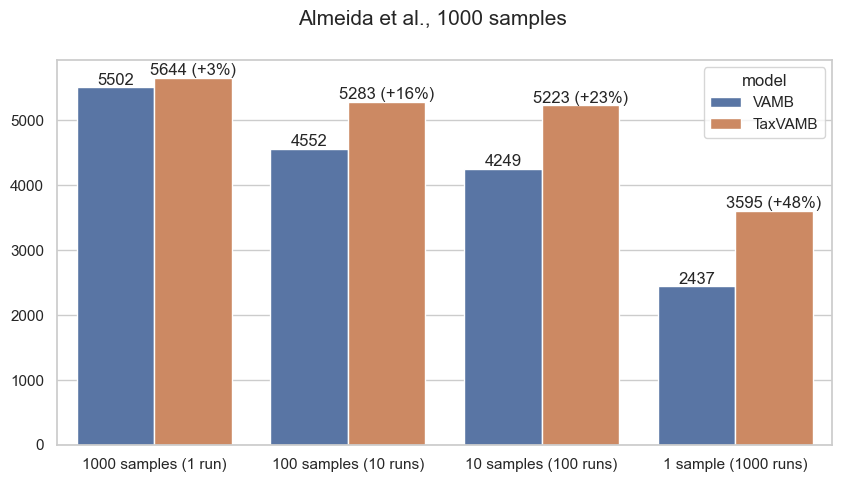

In [79]:
values_dict_simple = {
    'Almeida et al.': {
        'VAMB': {
            '1000 samples (1 run)': 5502, 
            '100 samples (10 runs)': 4552, 
            '10 samples (100 runs)': 4249,
            '1 sample (1000 runs)': 2437,
        },
        'TaxVAMB': {
            '1000 samples (1 run)': 5644, 
            '100 samples (10 runs)': 5283, 
            '10 samples (100 runs)': 5223,
            '1 sample (1000 runs)': 3595,
        },
    },
}

levels_names = ['1000 samples (1 run)', '100 samples (10 runs)', '10 samples (100 runs)', '1 sample (1000 runs)']

def make_df_from_values(values_dict):
    levels = []
    models = []
    values = []
    datasets = []

    for dataset, v1 in values_dict.items():
        for model, v2 in v1.items():
            for level, value in v2.items():
                levels.append(level)
                models.append(model)
                values.append(value)
                datasets.append(dataset)

    df_longread = pd.DataFrame({
        'model': models,
        '# of NC strains': values,
        'dataset': datasets,
        'level': levels,
    })
    
    return df_longread

# df_longread_reclustered = make_df_from_values(values_dict_reclustered)
# df_longread = make_df_from_values(values_dict)
df_longread_simple = make_df_from_values(values_dict_simple)

f, axs = plt.subplots(1, 1, figsize=(10, 5))

for i, dataset in enumerate(['Almeida et al.']):
    df_s = df_longread_simple[df_longread_simple['dataset'] == dataset]
    g = sns.barplot(
        x='level', 
        y='# of NC strains', 
        hue='model',
        order=levels_names,
        data=df_s, 
        orient='v', 
        ax=axs,
    )
    
    for i, cont in enumerate(axs.containers):
        if i == 1:
            prev = axs.containers[0].datavalues
            axs.bar_label(cont, labels=[f'{v:.0f} (+{(v-prev[j])*100 / prev[j]:.0f}%)' for j, v in enumerate(cont.datavalues)], label_type='edge')
        else:
            axs.bar_label(cont, label_type='edge')
    axs.set_xlabel('')
    axs.set_ylabel('')
f.suptitle('Almeida et al., 1000 samples', fontsize=15)


plt.savefig(f'../figures/figure5b.pdf', bbox_inches = 'tight')

# Figure 5c

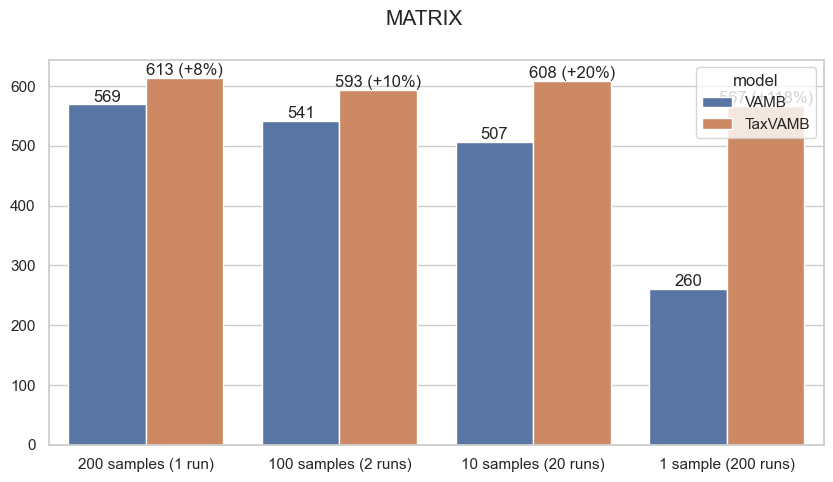

In [80]:
values_dict_simple = {
    'MATRIX': {
        'VAMB': {
            '200 samples (1 run)': 569, 
            '100 samples (2 runs)': 541, 
            '10 samples (20 runs)': 507,
            '1 sample (200 runs)': 260,
        },
        'TaxVAMB': {
            '200 samples (1 run)': 613, 
            '100 samples (2 runs)': 593, 
            '10 samples (20 runs)': 608,
            '1 sample (200 runs)': 567,
        },
    },
}

levels_names = ['200 samples (1 run)', '100 samples (2 runs)', '10 samples (20 runs)', '1 sample (200 runs)']

def make_df_from_values(values_dict):
    levels = []
    models = []
    values = []
    datasets = []

    for dataset, v1 in values_dict.items():
        for model, v2 in v1.items():
            for level, value in v2.items():
                levels.append(level)
                models.append(model)
                values.append(value)
                datasets.append(dataset)

    df_longread = pd.DataFrame({
        'model': models,
        '# of NC strains': values,
        'dataset': datasets,
        'level': levels,
    })
    
    return df_longread

# df_longread_reclustered = make_df_from_values(values_dict_reclustered)
# df_longread = make_df_from_values(values_dict)
df_longread_simple = make_df_from_values(values_dict_simple)

f, axs = plt.subplots(1, 1, figsize=(10, 5))

for i, dataset in enumerate(['MATRIX']):
    df_s = df_longread_simple[df_longread_simple['dataset'] == dataset]
    g = sns.barplot(
        x='level', 
        y='# of NC strains', 
        hue='model',
        order=levels_names,
        data=df_s, 
        orient='v', 
        ax=axs,
    )
    
    for i, cont in enumerate(axs.containers):
        if i == 1:
            prev = axs.containers[0].datavalues
            axs.bar_label(cont, labels=[f'{v:.0f} (+{(v-prev[j])*100 / prev[j]:.0f}%)' for j, v in enumerate(cont.datavalues)], label_type='edge')
        else:
            axs.bar_label(cont, label_type='edge')
    axs.set_xlabel('')
    axs.set_ylabel('')
#     axs.set_title('NC bins, comp>0.9, cont<0.05', fontsize=16)
f.suptitle('MATRIX', fontsize=15)


plt.savefig(f'../figures/figure5c.pdf', bbox_inches = 'tight')

# Figure 6b

In [83]:
df = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Figure 6b', header=None)

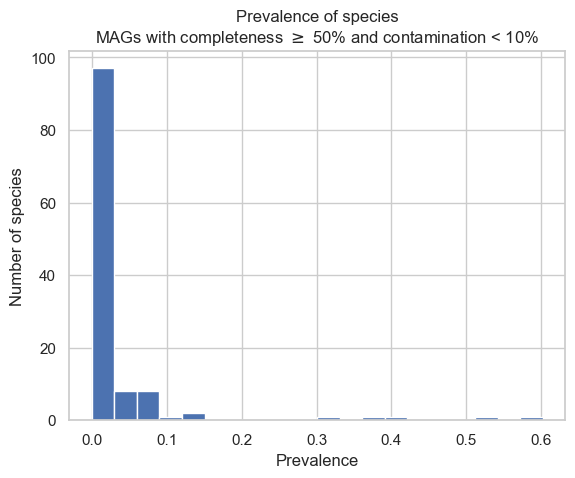

In [85]:
plt.hist(df[0], bins=20)
plt.title('Prevalence of species\nMAGs with completeness $\geq$ 50% and contamination < 10%')
plt.xlabel('Prevalence')
plt.ylabel('Number of species')
plt.savefig('../figures/figure6b.pdf')
plt.show()


plt.show()

# Figure 6c

In [86]:
df = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Figure 6c')

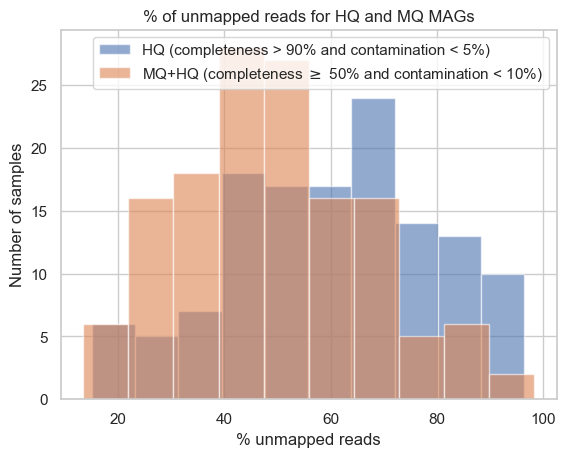

In [87]:
plt.hist(df['unmapped_reads - HQ'], label='HQ (completeness > 90% and contamination < 5%)', alpha=0.6, bins=10)
plt.hist(df['unmapped_reads - HQ+MQ'], label=r'MQ+HQ (completeness $\geq$ 50% and contamination < 10%)', alpha=0.6, bins=10)
plt.legend()
plt.title('% of unmapped reads for HQ and MQ MAGs')
plt.xlabel('% unmapped reads')
plt.ylabel('Number of samples')
plt.savefig('../figures/figure6c.pdf')
plt.show()

# Supplementary Figure 4

In [91]:
df_met = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Supplementary Figure 4')

In [92]:
with_reclustering = [
    'Metabuli', 
    'Metabuli+TaxVAMB', 
]

label_map = {
    'Metabuli': 'Metabuli', 
    'Metabat': 'Metabat', 
    'Metadecoder': 'Metadecoder', 
    'Comebin': 'Comebin', 
    'SemiBin (WITH reclustering)': 'SemiBin', 
    'AVAMB (reclustering)': 'AVAMB', 
    'VAMB (reclustering)': 'VAMB', 
    'MMSeqs+TaxVAMB (reclustered)': 'TaxVAMB (MMSeqs)', 
    'Metabuli+TaxVAMB (reclustered)': 'TaxVAMB (Metabuli)', 
    'Metabuli+TaxVAMB': 'TaxVAMB (Metabuli)', 
    'Kraken2+TaxVAMB (reclustered)': 'TaxVAMB (Kraken2)', 
    'Centrifuge+TaxVAMB (reclustered)': 'TaxVAMB (Centrifuge)', 
}

label_map_values = [
    'Metabuli', 
    'TaxVAMB (Metabuli)', 
]

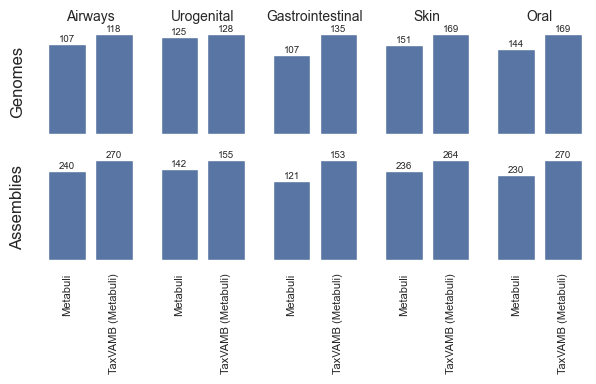

In [94]:
sns.set_theme(style="whitegrid")

df_final = df_met[df_met['Method'].isin(with_reclustering)].copy()
df_final['labels'] = df_final['Method'].map(label_map)

f, axs = plt.subplots(2, 5, figsize=(7, 3), sharex=True, sharey=False)

taxvamb_colors = ['#ade1f9']*4
colors = ['#f0b3b2', '#ffcccc', '#a1e3a1', '#c9b3de', '#ffd1a4', '#dedf99'] + taxvamb_colors

map_labels = {
    'BB NC genomes': 'Genomes',
    'BB NC asms': 'Assemblies',
}

for j, s in enumerate(['Airways', 'Urogenital', 'Gastrointestinal', 'Skin', 'Oral']):
    df_s = df_final[df_final['Dataset'] == s]
    sns.set_color_codes("pastel")
    sns.despine(left=True, bottom=True)
    for i, Y in enumerate(['BB NC genomes', 'BB NC asms']):
        
        ax = axs[i][j]
        g = sns.barplot(x="labels", y=Y, data=df_s, orient='v', order=label_map_values, ax=ax)

        heights = []
        for bars in ax.containers:
            ax.bar_label(bars, label_type='edge', size=7)
            for _, bar in enumerate(bars):
                heights.append(bar.get_height())
                
        ax.set_xlabel('')
        if j != 0:
            ax.set_ylabel('')
        else:
            ax.set_ylabel(map_labels[Y], fontsize=12)
        if i == 0:
            ax.set_title(s, fontsize=10)
        ax.grid(False)

    
for j in range(10):
    ax = axs.flat[j]
    ax.tick_params(axis='x', rotation=90)
#     axs.flat[j].set_xticklabels(axs.flat[j].get_xticklabels(), size = 7)
    ax.set_yticklabels([])
    ax.set_xticks(list(range(len(label_map_values))))
    ax.set_xticklabels(label_map_values, size=8)




plt.savefig('../figures/supfigure4.pdf', bbox_inches = 'tight')
plt.show()

# Supplementary Figure 5

In [107]:
df_met = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Supplementary Figure 5')

In [108]:
with_reclustering = [
    'MMSeqs+TaxVAMB', 
    'Metabuli+TaxVAMB', 
    'Kraken2+TaxVAMB', 
    'Centrifuge+TaxVAMB', 
    'Stacked VAE (MMseqs)', 
    'Stacked VAE (Metabuli)', 
    'Stacked VAE (Kraken)', 
    'Stacked VAE (Centrifuge)', 
]

classifiers = [
    'MMSeqs', 
    'Metabuli', 
    'Kraken2', 
    'Centrifuge', 
    'MMSeqs', 
    'Metabuli', 
    'Kraken2', 
    'Centrifuge', 
]

models = [
    'TaxVAMB', 
    'TaxVAMB', 
    'TaxVAMB', 
    'TaxVAMB', 
    'Stacked VAE', 
    'Stacked VAE', 
    'Stacked VAE', 
    'Stacked VAE', 
]

labels_plot = [
    'MMSeqs', 
    'Metabuli', 
    'Kraken2', 
    'Centrifuge', 
]

label_map = {k: v for k, v in zip(with_reclustering, classifiers)}
model_map = {k: v for k, v in zip(with_reclustering, models)}

<Figure size 640x480 with 0 Axes>

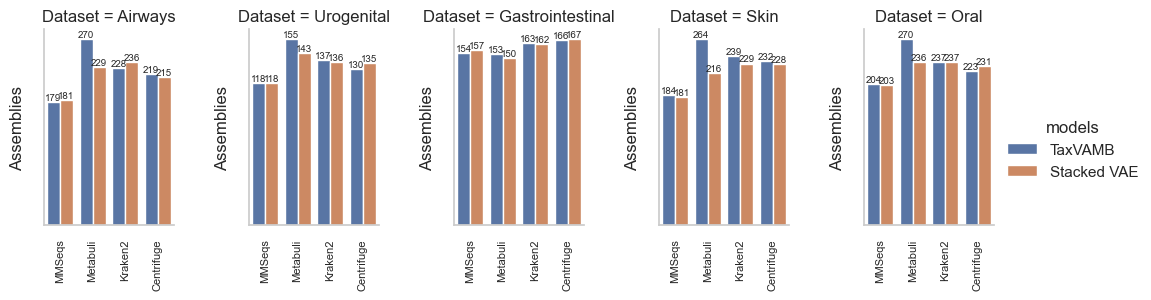

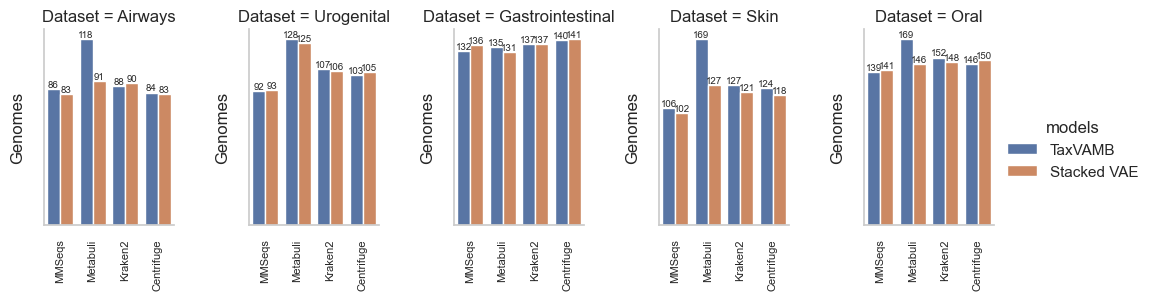

In [109]:
sns.set_theme(style="whitegrid")

df_final = df_met[df_met['Method'].isin(with_reclustering)]
df_final = df_met[df_met['Dataset'].isin(['Airways', 'Urogenital', 'Gastrointestinal', 'Skin', 'Oral'])]
df_final['labels'] = df_final['Method'].map(label_map)
df_final['models'] = df_final['Method'].map(model_map)

# f, axs = plt.subplots(2, 5, figsize=(18, 6), sharex=True, sharey=False)

taxvamb_colors = ['#ade1f9']*4
colors = ['#f0b3b2', '#ffcccc', '#a1e3a1', '#c9b3de', '#ffd1a4', '#dedf99'] + taxvamb_colors

map_labels = {
    'BB NC genomes': 'Genomes',
    'BB NC asms': 'Assemblies',
}


sns.set_color_codes("pastel")
sns.despine(left=True, bottom=True)
for i, Y in enumerate(['BB NC asms', 'BB NC genomes']):

    g = sns.catplot(kind="bar", data=df_final, x="labels", y=Y, hue="models", col="Dataset", aspect=0.7, height=3, sharey=False)
    
    for i in range(5):
        for j in range(1):
            ax = g.facet_axis(j, i)
            heights = []
            for bars in ax.containers:
                ax.bar_label(bars, label_type='edge', size=7)
                for _, bar in enumerate(bars):
                    heights.append(bar.get_height())

            ax.set_xlabel('')
            if j != 0:
                ax.set_ylabel('')
            else:
                ax.set_ylabel(map_labels[Y], fontsize=12)
            ax.grid(False)

            ax.tick_params(axis='x', rotation=90)
        #     axs.flat[j].set_xticklabels(axs.flat[j].get_xticklabels(), size = 7)
            ax.set_yticklabels([])
            ax.set_xticks(list(range(len(labels_plot))))
            ax.set_xticklabels(labels_plot, size=8)




plt.savefig('../figures/supfigure5a.pdf', bbox_inches = 'tight')
plt.show()

In [110]:
df_met = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Figure 4a,b')

In [111]:
with_reclustering = [
    'TaxVAMB + MMSeqs', 
    'TaxVAMB+Metabuli', 
    'TaxVAMB+Kraken2', 
    'TaxVAMB+Centrifuge', 
    'Stacked VAE (MMSeqs), 0.5', 
    'Stacked VAE (Metabuli), 0.95', 
    'Stacked VAE (Kraken), 0.95', 
    'Stacked VAE (Centrifuge), 0.95', 
]

classifiers = [
    'MMSeqs', 
    'Metabuli', 
    'Kraken2', 
    'Centrifuge', 
    'MMSeqs', 
    'Metabuli', 
    'Kraken2', 
    'Centrifuge', 
]

models = [
    'TaxVAMB', 
    'TaxVAMB', 
    'TaxVAMB', 
    'TaxVAMB', 
    'Stacked VAE', 
    'Stacked VAE', 
    'Stacked VAE', 
    'Stacked VAE', 
]

labels_plot = [
    'MMSeqs', 
    'Metabuli', 
    'Kraken2', 
    'Centrifuge', 
]

label_map = {k: v for k, v in zip(with_reclustering, classifiers)}
model_map = {k: v for k, v in zip(with_reclustering, models)}

<Figure size 640x480 with 0 Axes>

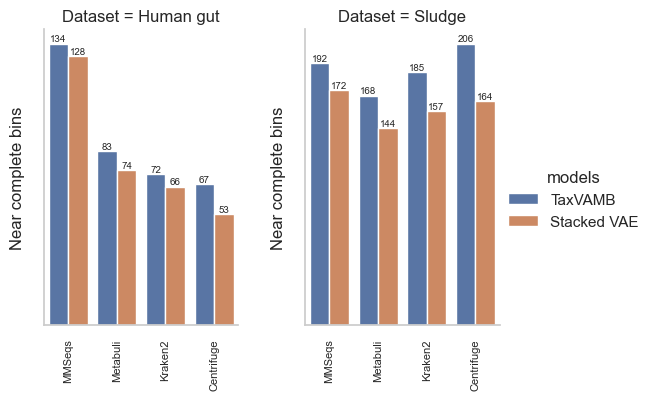

In [114]:
sns.set_theme(style="whitegrid")

df_final = df_met[df_met['Method'].isin(with_reclustering)].copy()
df_final['labels'] = df_final['Method'].map(label_map)
df_final['models'] = df_final['Method'].map(model_map)

# f, axs = plt.subplots(2, 5, figsize=(18, 6), sharex=True, sharey=False)

taxvamb_colors = ['#ade1f9']*4
colors = ['#f0b3b2', '#ffcccc', '#a1e3a1', '#c9b3de', '#ffd1a4', '#dedf99'] + taxvamb_colors

map_labels = {
    'BB NC genomes': 'Genomes',
    'BB NC asms': 'Assemblies',
}


sns.set_color_codes("pastel")
sns.despine(left=True, bottom=True)

g = sns.catplot(kind="bar", data=df_final, x="labels", y='NC bins (CheckM2)', hue="models", col="Dataset", aspect=0.7, height=4, sharey=False)

for i in range(2):
    for j in range(1):
        ax = g.facet_axis(j, i)
        heights = []
        for bars in ax.containers:
            ax.bar_label(bars, label_type='edge', size=7)
            for _, bar in enumerate(bars):
                heights.append(bar.get_height())

        ax.set_xlabel('')
        if j != 0:
            ax.set_ylabel('')
        else:
            ax.set_ylabel('Near complete bins', fontsize=12)
        ax.grid(False)

        ax.tick_params(axis='x', rotation=90)
        ax.set_yticklabels([])
        ax.set_xticks(list(range(len(labels_plot))))
        ax.set_xticklabels(labels_plot, size=8)




plt.savefig('../figures/supfigure5b.pdf', bbox_inches = 'tight')
plt.show()

# Supplementary Figure 6

In [118]:
df_res_all2 = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Supplementary Figure 6b')
df_res_all2 = df_res_all2.fillna('')

In [119]:
levels = ['d', 'p', 'c', 'o', 'f', 'g', 's']
charts = []
# for i, s in enumerate(['airways', 'skin', 'oral', 'urog', 'gi']):
df = df_res_all2[(df_res_all2['taxonomy'] == 's')]

chart = alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('model:N', title=None, sort=['gtdbtk', 'mmseqs_raw']),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(value):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
#         column=alt.Column('taxonomy:N', title=None, sort=levels),
    order=alt.Order(
      # Sort the segments of the bars by this field
      'metric',
      sort='ascending'
    ),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('metric:N',
            scale=alt.Scale(
                range=['#67a9cf', '#b31f2c', '#faae61'
                      ],
            ),
        ))



text=alt.Chart(df).mark_text(
#         align='center',
    baseline='top',
    dx=0, dy=5,
).encode(
    y=alt.Y('sum(value)',  stack='zero'),
    x=alt.X('model:N', sort=['mmseqs']),
    text=alt.Text('text'),
        order=alt.Order(
      # Sort the segments of the bars by this field
      'metric',
      sort='ascending'
    ),
)


chart_text = (chart + text).facet(
    column=alt.Column('dataset:N', title=None, sort=levels),

)
chart_text = chart_text.configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0
    )

charts.append(chart_text)



In [120]:
charts[0]

alt.FacetChart(...)

# Supplementary Figure 7

In [121]:
df_res_all2 = pd.read_excel('../data/TaxVAMB_Source_Data.xlsx', sheet_name='Supplementary Figure 7')
df_res_all2 = df_res_all2.fillna('')

In [122]:
levels = ['d', 'p', 'c', 'o', 'f', 'g', 's']
charts = []
# for i, s in enumerate(['airways', 'skin', 'oral', 'urog', 'gi']):
df = df_res_all2[(df_res_all2['taxonomy'] == 's')]

chart = alt.Chart(df).mark_bar().encode(

    # tell Altair which field to group columns on
    x=alt.X('model:N', title=None, sort=['gtdbtk', 'mmseqs_raw']),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(value):Q',
        axis=alt.Axis(
            grid=False,
            title=None)),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
#         column=alt.Column('taxonomy:N', title=None, sort=levels),
    order=alt.Order(
      # Sort the segments of the bars by this field
      'metric',
      sort='ascending'
    ),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('metric:N',
            scale=alt.Scale(
                range=['#67a9cf', '#b31f2c', '#faae61'
                      ],
            ),
        ))



text=alt.Chart(df).mark_text(
#         align='center',
    baseline='top',
    dx=0, dy=5,
).encode(
    y=alt.Y('sum(value)',  stack='zero'),
    x=alt.X('model:N', sort=['mmseqs']),
    text=alt.Text('text'),
        order=alt.Order(
      # Sort the segments of the bars by this field
      'metric',
      sort='ascending'
    ),
)


chart_text = (chart + text).facet(
    column=alt.Column('dataset:N', title=None, sort=levels),

)
chart_text = chart_text.configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0
    )

charts.append(chart_text)



In [123]:
charts[0]

alt.FacetChart(...)